In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_drug=pd.read_csv('drug200.csv')

In [3]:
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df_drug['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df_drug.shape

(200, 6)

In [6]:
###initial dataset exploration


In [7]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df_drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
###so we can see that drug y is more than others

In [10]:
df_drug.Sex.value_counts()  ##fairly balanced

M    104
F     96
Name: Sex, dtype: int64

In [11]:
df_drug.Cholesterol.value_counts()##fairly balanced

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [12]:
##Nummerical variables



In [13]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
skewage=df_drug.Age.skew(axis=0,skipna=True)
print('Age skewness: ', skewage)

Age skewness:  0.03030835703000607


In [15]:
skewage=df_drug.Na_to_K.skew(axis=0,skipna=True)
print('NA TO K skewness: ', skewage)

NA TO K skewness:  1.039341186028881


C:\Users\91974\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

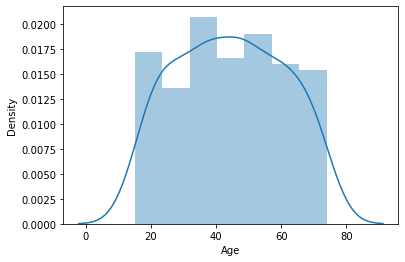

In [16]:
sns.distplot(df_drug['Age'])

C:\Users\91974\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

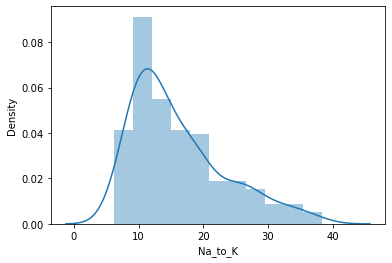

In [17]:
sns.distplot(df_drug['Na_to_K'])

In [18]:
##the distribution of age column is symmetric since the skewness is between -0.5and0.5
##the distribution of age column is moderatly skwed since the skewness is between 0.5and 1

## EDA(more)

In [19]:
## Drug type distribution



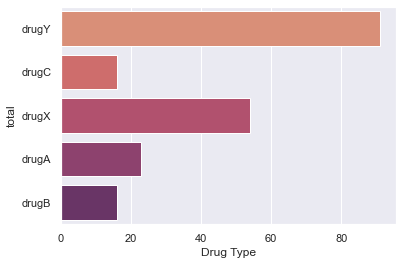

In [20]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Drug',data=df_drug,palette='flare')
plt.xlabel('Drug Type')
plt.ylabel('total')
plt.show()


In [21]:
##gender type distribution



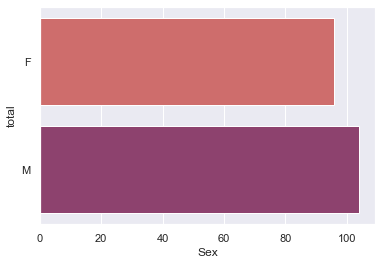

In [22]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Sex',data=df_drug,palette='flare')
plt.xlabel('Sex')
plt.ylabel('total')
plt.show()

In [23]:
##Blodd pressure dist



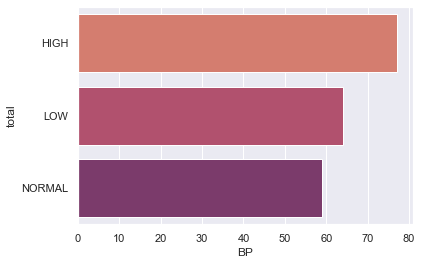

In [24]:
sns.set_theme(style='darkgrid')
sns.countplot(y='BP',data=df_drug,palette='flare')
plt.xlabel('BP')
plt.ylabel('total')
plt.show()

In [25]:
##cholerstol dist



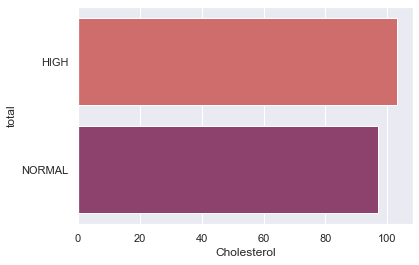

In [26]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Cholesterol',data=df_drug,palette='flare')
plt.xlabel('Cholesterol')
plt.ylabel('total')
plt.show()

## Gender Distribution base on drug type


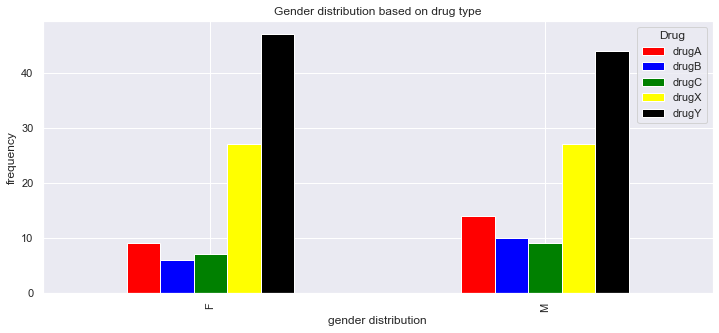

In [27]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind='bar',figsize=(12,5),color=['red','blue','green','yellow','black'])
plt.xlabel('gender distribution')
plt.ylabel('frequency')
plt.title('Gender distribution based on drug type')
plt.xticks(rotation=90)
plt.show()

### BP Distribution base on cholerstol


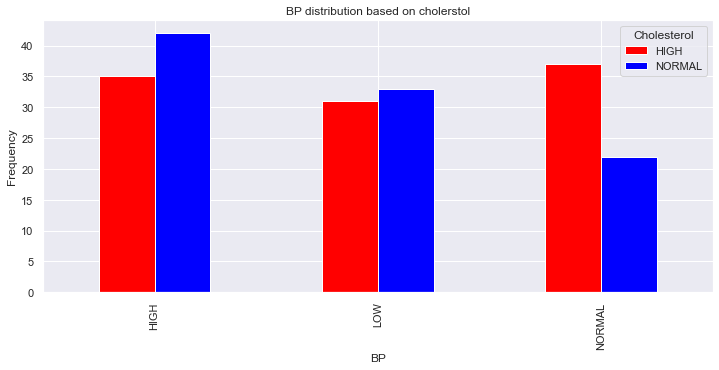

In [28]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind='bar',figsize=(12,5),color=['red','blue'])
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.title('BP distribution based on cholerstol')
plt.xticks(rotation=90)
plt.show()

#### sodium to pottasium based on gender and age

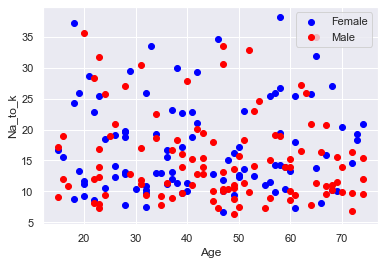

In [29]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'],y=df_drug.Na_to_K[(df_drug.Sex=='F')],c='blue')
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'],y=df_drug.Na_to_K[(df_drug.Sex=='M')],c='red')
plt.legend(['Female','Male'])
plt.xlabel('Age')
plt.ylabel('Na_to_k')
plt.show()


## Data preparation


#### Data bining

we are dividing the age category to certain age groups

In [30]:
bin_age=[0,19,29,39,49,59,69,80]
category=['<20s','20s','30s','40s','50s','60s','>60s']
df_drug['age_binned']=pd.cut(df_drug['Age'],bins=bin_age,labels=category)
df_drug=df_drug.drop(['Age'],axis=1)

we r making na to k divided by age groups

In [31]:
bin_natok=[0,9,19,29,50]
category_natok=['<10','10-20','20-30','>30']
df_drug['na_to_k_binned']=pd.cut(df_drug['Na_to_K'],bins=bin_natok,labels=category_natok)
df_drug=df_drug.drop(['Na_to_K'],axis=1)

In [32]:
df_drug.head()

,Sex,BP,Cholesterol,Drug,age_binned,na_to_k_binned
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,drugY,60s,10-20


### splitting the dataset


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
x=df_drug.drop(['Drug'],axis=1)
y=df_drug['Drug']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
x_train

,Sex,BP,Cholesterol,age_binned,na_to_k_binned
169,F,HIGH,HIGH,20s,10-20
97,F,HIGH,HIGH,50s,20-30
31,M,HIGH,HIGH,>60s,10-20
12,M,LOW,HIGH,40s,10-20
35,M,NORMAL,NORMAL,40s,<10
...,...,...,...,...,...
106,M,NORMAL,HIGH,20s,10-20
14,F,NORMAL,HIGH,50s,10-20
92,F,HIGH,HIGH,20s,>30
179,F,NORMAL,HIGH,60s,10-20


### Feature engineering

As most of a values are categorical we use 1 hot encoding

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
x_train['Sex'].unique()

array(['F', 'M'], dtype=object)

In [39]:
x_train['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [40]:
x_train['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [41]:
x_train['age_binned'].unique()

['20s', '50s', '>60s', '40s', '60s', '30s', '<20s']
Categories (7, object): ['<20s' < '20s' < '30s' < '40s' < '50s' < '60s' < '>60s']

In [42]:
x_train['na_to_k_binned'].unique()

['10-20', '20-30', '<10', '>30']
Categories (4, object): ['<10' < '10-20' < '20-30' < '>30']

In [43]:
encoder=OneHotEncoder()
x_train=pd.DataFrame(encoder.fit_transform(x_train).toarray())
x_test=pd.DataFrame(encoder.fit_transform(x_test).toarray())

In [44]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Smote technique

since drug y is more than others,obersampling is carried out due to over fitting

In [46]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(y=y_train,data=df_drug,palette='mako_r')
plt.ylabel('Drugtype')
plt.xlabel('total')
plt.show()

## Models

trying different models

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclass=LogisticRegression(solver='liblinear',max_iter=5000)
LRclass.fit(x_train,y_train)

y_pred=LRclass.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score

LRacc=accuracy_score(y_test,y_pred)
print('Logistic accuracy is: {:.2f}%'.format(LRacc*100))


K neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclass=KNeighborsClassifier(n_neighbors=20)
KNclass.fit(x_train,y_train)

y_pred=KNclass.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score

KNacc=accuracy_score(y_test,y_pred)
print('KNN accuracy is: {:.2f}%'.format(KNacc*100))

scorelisten
 ###### making KNN better

In [ ]:
scorelisten=[]  ##tuning
for i in range(1,30):
    KNclassifier=KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(x_train,y_train)
    scorelisten.append(KNclassifier.score(x_test,y_test))
    
plt.plot(range(1,30),scorelisten)
plt.xticks(np.arange(1,30,1))
plt.xlabel('K value')
plt.ylabel('score')
plt.show()
KNAccMax=max(scorelisten)
print('KNN acc max: {:.2f}%'.format(KNAccMax*100))

SUPPORT VECTOR MACHINE(SVM)

In [ ]:
from sklearn.svm import SVC
SVCclass=SVC(kernel='linear',max_iter=251)
SVCclass.fit(x_train,y_train)

y_pred=SVCclass.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score

SVCacc=accuracy_score(y_test,y_pred)
print('SVC accuracy is: {:.2f}%'.format(SVCacc*100))

### Naive bayes


categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
NBclass=CategoricalNB()
NBclass.fit(x_train,y_train)

y_pred=NBclass.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score

NBacc=accuracy_score(y_test,y_pred)
print('NB accuracy is: {:.2f}%'.format(NBacc*100))

Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GBclass=GaussianNB()
GBclass.fit(x_train,y_train)

y_pred=GBclass.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score

GBacc=accuracy_score(y_test,y_pred)
print('GB accuracy is: {:.2f}%'.format(GBacc*100))

## ModelComparison

In [ ]:
compare=pd.DataFrame({'model':['LR','KN','KNMAX','SVM','CB','GB']
                     ,'Accuracy':[LRacc*100,KNacc*100,KNAccMax*100,SVCacc*100,
                                  NBacc*100,GBacc*100]})

In [ ]:
compare.sort_values(by="Accuracy",ascending=False)

In [ ]:
x

In [ ]:
import pickle

In [ ]:
pickle.dump(LRclass,open('finalmodel.pkl','wb'))


In [ ]:
pickle.dump(encoder,open('finalencoder.pkl','wb'))


In [ ]:
model=pickle.load(open('finalmodel.pkl','rb'))


In [ ]:
enc=pickle.load(open('finalencoder.pkl','rb'))

In [ ]:
tt=np.array([['M','NORMAL','NORAML','<40s','>30s']])

In [ ]:
sc=